In [53]:
#!pip install pystan~=2.14

In [54]:
#!pip install fbprophet

In [55]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [56]:
code = 'SSGC'
filename = lambda x: f'/content/drive/MyDrive/stockdata/{x}.csv'
read = filename(code)

df = pd.read_csv(read,delimiter='\t',header=None)
df.columns = ['ds','Open','High','Low','y','Volume']
df = df[['ds','y']]
df['ds'] = pd.to_datetime(df['ds'],infer_datetime_format=True)
df

# df.set_index('Time',inplace=True)

,ds,y
0,2020-01-01,22.19
1,2020-01-02,22.82
2,2020-01-03,22.35
3,2020-01-06,21.24
4,2020-01-07,21.72
...,...,...
726,2022-12-05,9.77
727,2022-12-06,9.50
728,2022-12-07,10.19
729,2022-12-08,10.03


In [57]:
train = df.iloc[:-90]
test = df.iloc[-90:]

In [58]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(train)


In [59]:
future_dates = prophet.make_future_dataframe(periods=180)
predictions = prophet.predict(future_dates)

In [60]:
plot_plotly(prophet,predictions)

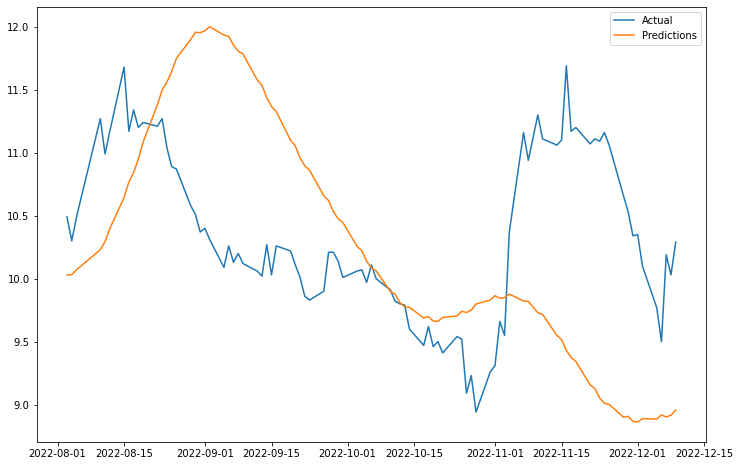

In [61]:
plt.figure(figsize=(12,8))

pred = predictions[predictions['ds'].isin(test['ds'])]

plt.plot(test['ds'],test['y'],label='Actual')
plt.plot(pred['ds'],pred['yhat'],label='Predictions')

plt.legend()
plt.show()

In [62]:
rmse = mean_squared_error(test['y'],pred['yhat'])
rmse

1.239895991736592